In [1]:
#importing library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
#showing the dataset
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [4]:
#checking for priliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
#replacing Medal feature with boolean column
df['Medal']=df['Medal'].apply(lambda x:1 if str(x)!='nan' else 0)

In [6]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [7]:
#checking for number of categorical columns
df['Medal'].value_counts()

Medal
0    231333
1     39783
Name: count, dtype: int64

In [8]:
#dropping unnecessary column
df=df.drop(['ID','Name','Games'],axis=1)
df

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [9]:
#checking for missing values in the dataset
df.isna().sum()

Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [10]:
#checking for percentage of missing  values in each column
df.isna().mean()

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     271116 non-null  object 
 1   Age     261642 non-null  float64
 2   Height  210945 non-null  float64
 3   Weight  208241 non-null  float64
 4   Team    271116 non-null  object 
 5   NOC     271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   271116 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 24.8+ MB


In [12]:
[column for column in df.columns if df[column].dtypes!='object']

['Age', 'Height', 'Weight', 'Year', 'Medal']

In [13]:
#grouping the column based on medal and sex
df[['Sex','Age', 'Height', 'Weight','Medal']].groupby(['Medal','Sex']).mean().astype(int)

Age  Height  Weight
Medal Sex                     
0     F     23     167      59
      M     26     178      75
1     F     24     170      63
      M     26     181      79

In [14]:
df['Medal'].value_counts()

Medal
0    231333
1     39783
Name: count, dtype: int64

In [15]:
#filling the missing values with mean of that column
for column in ['Age','Weight','Height']:
    df[column]=df[column].fillna(df[column].mean())
df

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.00000,80.000000,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23.0,170.00000,60.000000,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24.0,175.33897,70.702393,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21.0,185.00000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.00000,89.000000,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27.0,176.00000,59.000000,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27.0,176.00000,59.000000,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30.0,185.00000,96.000000,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [16]:
#checking for missing value after fillna
print('Total missing value',df.isna().sum().sum())

Total missing value 0


In [17]:
#getting number of unique column in each column for object

{column:len(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [18]:
#creating function to encode binary,ordinal and nominal features

def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x:1 if x==positive_value else 0)
    return df
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    for column in df.columns:
        if df[column].dtypes=='bool':
            df[column]=df[column].astype(int)
    return df

        


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     271116 non-null  object 
 1   Age     271116 non-null  float64
 2   Height  271116 non-null  float64
 3   Weight  271116 non-null  float64
 4   Team    271116 non-null  object 
 5   NOC     271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   271116 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 24.8+ MB


In [20]:
{column:list(df[column].unique()) for  column in df.columns if column in ['Sex','Season']}

{'Sex': ['M', 'F'], 'Season': ['Summer', 'Winter']}

In [21]:
#applying function
df=binary_encode(df,['Sex','Season'],['M','Summer'])
df=onehot_encode(df,['Team','NOC','City','Sport','Event'])

In [22]:
df

,Sex,Age,Height,Weight,Year,Season,Medal,Team_30. Februar,Team_A North American Team,Team_Acipactli,...,"Event_Wrestling Men's Super-Heavyweight, Greco-Roman","Event_Wrestling Men's Unlimited Class, Greco-Roman","Event_Wrestling Men's Welterweight, Freestyle","Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle"
0,1,24.0,180.00000,80.000000,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23.0,170.00000,60.000000,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24.0,175.33897,70.702393,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34.0,175.33897,70.702393,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21.0,185.00000,82.000000,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29.0,179.00000,89.000000,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27.0,176.00000,59.000000,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27.0,176.00000,59.000000,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30.0,185.00000,96.000000,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


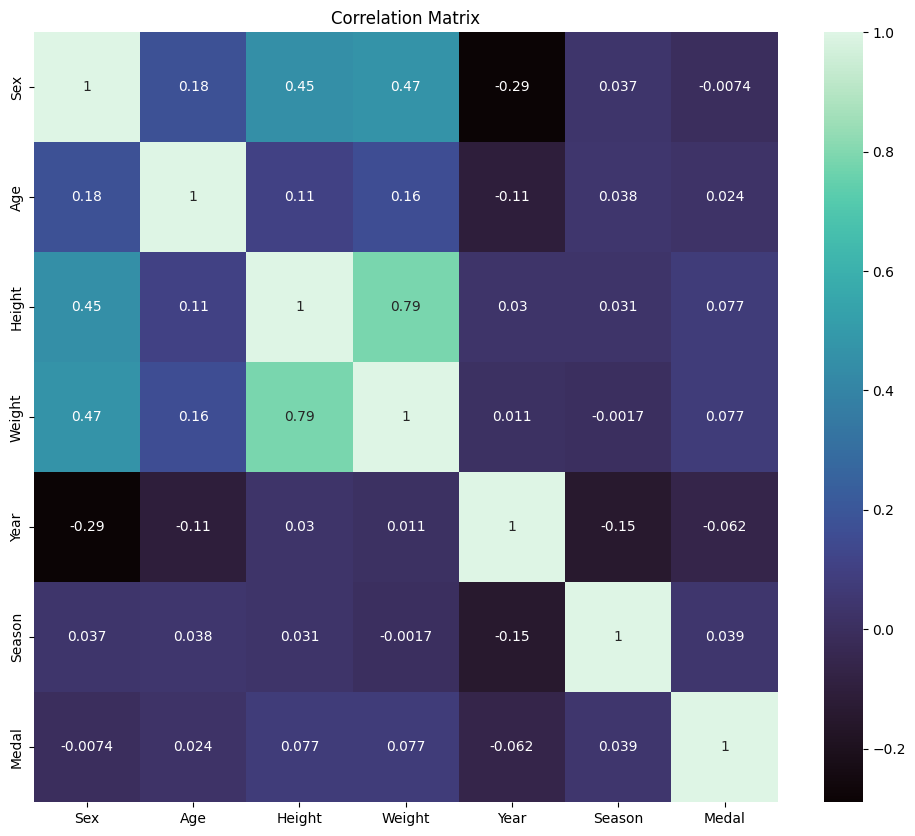

In [23]:
#creatng correlation matrix
corr=df.loc[:,:'Medal'].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [24]:
#Splitting and Scaling the Dataset
y=df['Medal']
x=df.drop('Medal',axis=1)
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)

(189781, 2293)
(81335, 2293)
(189781, 2293)
(81335, 2293)


In [ ]:
x_train

In [25]:
#constructing the keras model
inputs=tf.keras.Input(shape=(2293,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2293)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       146,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,041 (590.00 KB)

 Trainable params: 151,041 (590.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
history=model.fit(x_train,y_train,validation_split=0.2,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                                                 patience=3,
                                                                                                 restore_best_weights=True))

I0000 00:00:1733477186.825235    2600 service.cc:145] XLA service 0x7fa62c04e8c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733477186.825282    2600 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733477186.825286    2600 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 102/4745 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8356 - auc: 0.5281 - loss: 0.4921

I0000 00:00:1733477188.016926    2600 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4745/4745 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8640 - auc: 0.7590 - loss: 0.3581 - val_accuracy: 0.8823 - val_auc: 0.8439 - val_loss: 0.3028


In [27]:
#Result
model.evaluate(x_test,y_test)

2542/2542 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8865 - auc: 0.8407 - loss: 0.2998


[0.3013789653778076, 0.8849818706512451, 0.8412685394287109]

In [28]:
y_pred=model.predict(x_test)
y_pred=(np.squeeze(y_pred)>0.5).astype(int)

2542/2542 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


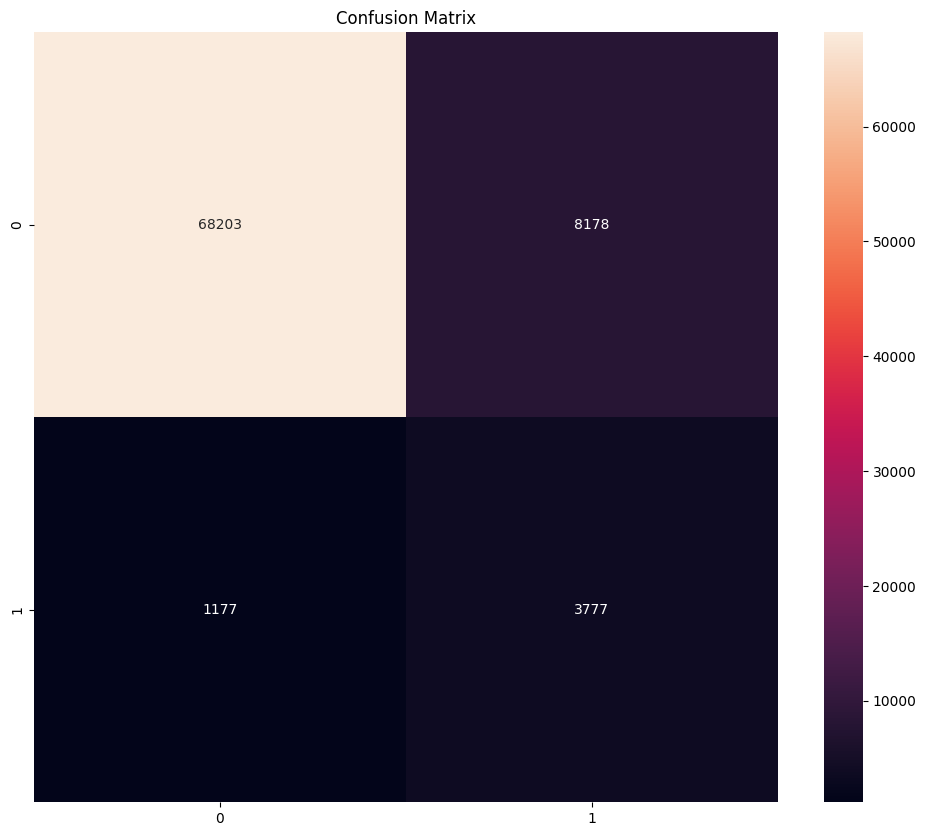

In [29]:
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [30]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.89      0.94     76381
           1       0.32      0.76      0.45      4954

    accuracy                           0.88     81335
   macro avg       0.65      0.83      0.69     81335
weighted avg       0.94      0.88      0.91     81335



In [ ]:
df['Sex'].value_counts()